# Calcul des forces de pression sur une digue

Une digue est un petit barrage permettant de retenir une étendue d'eau (mer, lac, rivière) par exemple pour protéger des habitations ou des installations en zone inondable. 

Dans ce mini-projet vous allez calculer numériquement les forces appliquées à une digue de forme arbitraire.

![Digue.png](./Digue.png)

## Travail à la maison

La digue que nous allons modéliser est un bloc de béton (masse volumique : 3000 kg/m$^3$) posé sur le sol rocheux (coefficient de friction statique béton - roche : 0.5). D'un côté la digue retient une masse d'eau de hauteur $H$, l'autre côté étant exposé à l'air. On prendra $H=10$ m dans toute la suite. 

Pour simplifier, on se placera en deux dimensions (la digue est de longueur unitaire suivant l'axe perpendiculaire au schéma ci-dessus et on ne considérera pas les bords suivant cette direction).

De plus on ne considérera que les forces de pressions dues à la hauteur d'eau (la pression de l'air étant négligée).

a. Faites un bilan des forces appliquées à la digue en 2D. Quelle force permet à la digue de ne pas glisser sur le sol rocheux ?

Bilan des forces: 
- Poids de la digue
- Réaction normale du support
- Pression de l'eau
- Force de frottement

- Force de frottement : f = mu * N 

b. Rappelez l'expression de la pression hydrostatique dans l'eau $P_{eau} (x)$ en fonction de la hauteur par rapport au sol $x$.

P = rho * g * x

c. Rappelez la (les) équation(s) d'équilibre statique de la digue.

- Equation dans y : 
    P + N = 0
- Equation dans x : 
    Pression + frottement = 0

### Modélisation

Pour considérer une digue de forme arbitraire, on modélisera les pentes côté air et côté eau par des fonctions mathématiques. Dans ce projet nous allons intégrer des fonctions suivant la direction donnée par l'axe vertical $y$. Il sera donc plus pratique de définir les pentes de la digue comme étant $x$ en fonction de $y$ (schéma ci-dessous).

![DigueSchema.png](./DigueSchema.png)


On définit donc :

* une fonction croissante $f_{air}(y)$ représentant l'interface air-béton définie pour $0 \leq y \leq H$ et allant de $x_a$ à $0$,
* une autre fonction décroissante $f_{eau}(y)$ représentant l'interface eau-béton définie sur le même intervalle et allant de $x_e$ à $0$. 

On ne considérera ici que des fonctions monotones.

On donne l'expression de la courbe côté air pour une digue représentée par une fonction affine :

$$
f_{air}(y) = -\frac{x_a}{H}.(y-H)
$$

d. Donnez l'expression de la fonction côté eau dans le cas d'une fonction affine, et tracez-la avec le code suivant.

$$
f_{eau}(y) = -\frac{x_e}{H}.(y-H)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ce code permet d'afficher les courbes représentant la digue

H = 10
xa = -5
xe = +5
rho_eau = 1000
rho_beton = 3000
g = 9.81

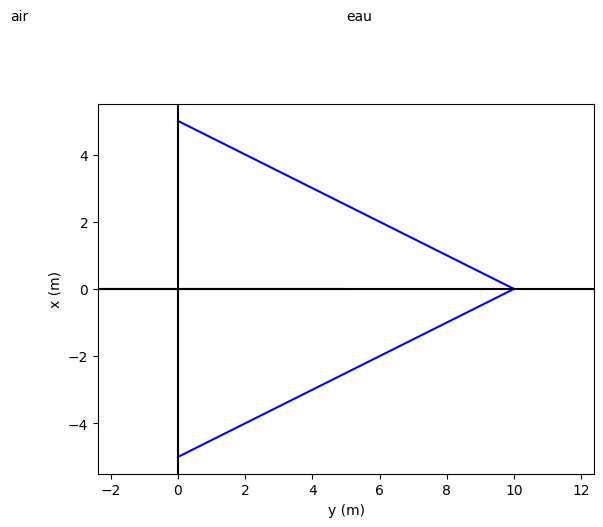

In [3]:

# On définit les fonctions côté eau et côté air, ici les courbes concaves
def fair(y):
    return -(y - H) * xa / H

def feau(y):
    return  -(y - H) * xe / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(y, fair(y), '-b') 
plt.plot(y, feau(y), '-b')  ## Décommenter après avoir codé la fonction feau(x)
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('y (m)') 
plt.ylabel('x (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(0, 10)
plt.show()

## Travail en séance

On rappelle que les forces de pression s'exercent perpendiculairement à la surface d'application. Il faut donc pouvoir trouver un vecteur normal à la tangente de ces deux fonctions en tout point, qui sera le vecteur directeur de la force de pression locale.

![DigueAngles.png](./DigueAngles.png)

On rappelle que l'angle $\theta$ entre la tangente en un point et l'axe des abscisses (voir schéma ci-dessus) est relié à la dérivée de la courbe par :

$$
tan(\theta) = f'(y)
$$

Les vecteurs $\vec t$ et $\vec n$ sont alors donnés par :

$$
\vec t = \cos(\theta).\vec{u_y} + \sin(\theta).\vec{u_x}
$$

$$
\vec n =  \sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x} 
$$


Pour pouvoir calculer la résultante des forces de pression sur une surface de forme arbitraire, il nous faut intégrer les forces infinitésimales $\vec{\mathrm{d}F}$ s'appliquant à chaque élément de surface $\mathrm{d}S$. Comme nous sommes en deux dimensions, nous pouvons simplifier le problème en considérant que l'élément de surface est $\mathrm{d}S = L \mathrm{d}l$, avec $L = 1$ la longueur unitaire de la digue suivant $z$, ce qui nous ramène à une intégrale 1D (on n'écrira pas $L$ dans la suite).

On obtient donc, pour l'interface eau-béton :

$$
\vec{F} = \iint_S \vec{\mathrm{d}F} =\int_0^H P(y) \mathrm{d}l . \vec{n}
$$

avec $\vec{n}$ le vecteur normal rentrant au point de coordonnées $(f(y),y)$, et $\mathrm{d}l$ la longueur infinitésimale de la courbe pour une variation $\mathrm{d}x$. On montre facilement la relation avec l'angle $\theta$ défini avant :

$$
\mathrm{d}l = \frac{\mathrm{d}y}{\cos(\theta)}
$$

### Cas des digues en pentes droites

a. Calculez le volume de la digue par intégration de la largeur de la digue en fonction de $y$. Comparez avec le calcul analytique (ici, l'aire du triangle multipliée par la longueur $L=1$). En déduire la force de gravité exercée sur la digue.

In [4]:
# On defini une fonction digue d'intégration par la méthode du point mileu
def integration_milieu(fonction, nb_pas, borne_sup, borne_inf=0): 
    delta_x = (borne_sup - borne_inf) / nb_pas
    liste_x = np.linspace(borne_inf + 0.5 * delta_x, borne_sup + 0.5 * delta_x, nb_pas)
    f_x = [fonction(x) for x in liste_x]
    integrale = np.array(f_x).sum() * delta_x  
    return integrale

In [5]:
aire_eau = integration_milieu(feau, 100000, 10, 0)
aire_eau

24.999750000000002

In [6]:
aire_air = integration_milieu(fair, 100000, 10, 0)
aire_air

-24.999750000000002

In [7]:
# Calcul de l'aire du triangle
aire = 0.5 * (xe - xa) * H
aire

50.0

In [8]:
def poids_digue(aire, rho, g):
    return aire * 1 * rho * g

In [9]:
poids_digue_droite = poids_digue(aire, rho_beton, g)
print(poids_digue_droite)

1471500.0


b. Pour le cas des fonctions affines, calculez la résultante (vectorielle ; il y a une composante suivant $x$ et une composante suivant $y$) des forces de pression côté eau. On prendra $x_a = -5$, $x_e = +5$, $H=10$. (On ne cherchera pas à faire le calcul analytique !)

On calcule la resultante des forces de pression en considerant n sections de notre volume d'eau qui exercent une pression sur n section de la digue d'interface dl. 
La force de pression de la section s'approxime par sa pression en son point milieu, Pression =  rho * g * h
La résultante est la somme des forces s'appliquant a l'interface

In [10]:
def fonction_pression_10(y):
        return 10 - y

In [11]:
def resultante_pression_x(fonction_pression, fonction_interface, hauteur_eau, g, rho, nb_pas): 
    ''' Fonction qui calcule la résultante des forces de pression d'un volume d'eau sur l'interface d'une digue '''
    resultante_x = -1 * rho * g * integration_milieu(fonction_pression, nb_pas, hauteur_eau)
    return resultante_x

def resultante_pression_y(fonction_pression, fonction_interface,hauteur_eau, g, rho, nb_pas): 
    ''' Fonction qui calcule la résultante des forces de pression d'un volume d'eau sur l'interface d'une digue '''
    resultante_y = rho * g * integration_milieu(fonction_pression, nb_pas, hauteur_eau) * (fonction_interface(hauteur_eau) - fonction_interface(0)) / hauteur_eau
    return resultante_y

In [12]:
resultante_pression_eau_x = resultante_pression_x(fonction_pression_10, feau, H, g, rho_eau, 1000000)
resultante_pression_eau_y = resultante_pression_y(fonction_pression_10, feau, H, g, rho_eau, 1000000)

print(resultante_pression_eau_x)
print(resultante_pression_eau_y)

-490499.5095000001
-245249.75475000002


c. En supposant que la digue est en équilibre statique translationnel, calculez avec le principe fondamental de la dynamique les deux composantes (normale et tangentielle) de la force de réaction du sol, puis le rapport de ces composantes $T/N$. En considérant le coefficient de frottement roche/béton de 0.5, la digue est-elle en équilibre translationnel ?

In [13]:
def rapport_reaction(poids_digue, resultante_pression_eau_x, resultante_pression_eau_y): 
    return abs(resultante_pression_eau_x) / (poids_digue + abs(resultante_pression_eau_y))

In [14]:
rapport_reaction(poids_digue_droite, resultante_pression_eau_x, resultante_pression_eau_y)

0.2857140408162916

d. Reprenez le calcul du rapport $T/N$ et du volume de béton en imposant $x_a=-5$ et $x_e=0$. La digue est-elle stable ? (Il sera utile d'écrire une fonction résumant les calculs des questions a. b. c.)

In [15]:
xa_new = -5
xe_new = 0

def fair_new(y):
    return -(y - H) * xa_new / H

def feau_new(y):
    return  -(y - H) * xe_new / H

aire_eau = integration_milieu(feau_new, 100000, 10, 0)
aire_air = integration_milieu(fair_new, 100000, 10, 0)
aire_totale = aire_eau - aire_air

volume_digue_new = aire_totale * 1 
poids_digue_new = poids_digue(volume_digue_new, rho_beton, g)

resultante_pression_eau_x_new = resultante_pression_x(fonction_pression_10, feau_new, 10, g, 1000, 1000000)
resultante_pression_eau_y_new = resultante_pression_y(fonction_pression_10, feau_new, 10, g, 1000, 1000000)

rapport_reaction_new = rapport_reaction(poids_digue_new, resultante_pression_eau_x_new, resultante_pression_eau_y_new)

print(rapport_reaction_new)

0.6666726667266674


In [16]:
resultante_pression_eau_y_new

0.0

e. Reprenez le calcul avec $x_a=0$ et $x_e=+5$. Que constatez-vous ? Expliquez pourquoi la digue est stable dans un cas mais pas l'autre.

In [17]:
xa_new = 0
xe_new = 5

def fair_new(y):
    return -(y - H) * xa_new / H

def feau_new(y):
    return  -(y - H) * xe_new / H

aire_eau = integration_milieu(feau_new, 100000, 10, 0)
aire_air = integration_milieu(fair_new, 100000, 10, 0)
volume_digue_new = (aire_eau - aire_air) * 1 
poids_digue_new = volume_digue_new * rho_beton * g

resultante_pression_eau_x_new = resultante_pression_x(fonction_pression_10, feau_new, 10, g, 1000, 1000000)
resultante_pression_eau_y_new = resultante_pression_y(fonction_pression_10, feau_new, 10, g, 1000, 1000000)

rapport_reaction_new = rapport_reaction(poids_digue_new, resultante_pression_eau_x_new, resultante_pression_eau_y_new)

print(rapport_reaction_new)

0.5000033750261564


### Commentaire

Dans le premier cas, la composante selon y de la pression sur la digue est nulle et la composante selon x est maximale.
Dans le second cas, la composante selon y de la pression sur la digue est non-nulle et la composante selon x est moindre.

Le poids de la digue est le meme dans les deux cas. 

Dans le second cas, on a moins de force qui s'applique dans une direction parallèle au sol et plus de force qui s'applique perpendiculairement au sol. 


### Cas des digues convexes

On considère maintenant que l'interface entre l'eau et le béton n'est plus une fonction affine mais une fonction de la forme :

$$
f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e
$$


on donne également la dérivée :

$$
f'_{eau} (y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}
$$

(on peut vérifier aisément que cette fonction relie bien les points de coordonées $[x_e,0]$ et $[0,H]$). Dans la suite nous prendrons $a=3$.

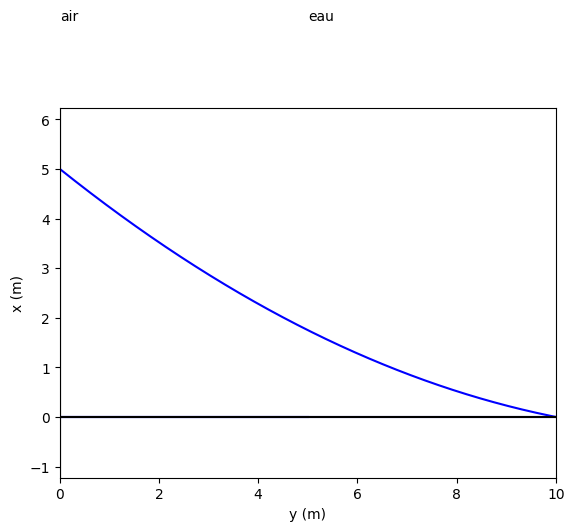

In [18]:
# Ce code permet d'afficher les courbes représentant la digue

H = 10
xe = 5
xa = 0

# On définit les fonctions côté eau et côté air, ici les courbes concaves
a = 3
def feau_convexe(y):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe

def f_prime_eau_convexe(y):
    return (2 * a * y / H**2) - (a + xe) / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(y, fair(y), '-b') 
plt.plot(y, feau_convexe(y), '-b')  ## Décommenter après avoir codé la fonction feau(x)
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('y (m)') 
plt.ylabel('x (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(0, 10)
plt.show()

e. Calculez, pour $a=3$, $x_a=0$ et $x_e=5$, la résultante des forces de pression, le volume de béton, et le rapport $T/N$ dans l'hypothèse de l'équilibre statique. La digue est-elle en équilibre translationnel ?

In [19]:
def resultante_pression_x_convexe(fonction_pression, fonction_interface, hauteur_eau, g, rho, nb_pas): 
    ''' Fonction qui calcule la résultante des forces de pression d'un volume d'eau sur l'interface d'une digue '''
    resultante_x = -1 * rho * g * integration_milieu(fonction_pression, nb_pas, hauteur_eau)
    return resultante_x

def resultante_pression_y_convexe(fonction_pression, fonction_interface,hauteur_eau, g, rho, nb_pas): 
    ''' Fonction qui calcule la résultante des forces de pression d'un volume d'eau sur l'interface d'une digue '''
    resultante_y = rho * g * integration_milieu(fonction_pression, nb_pas, hauteur_eau)
    return resultante_y

In [26]:
 
H = 10
xe = 5
xa = 0

def fonction_pression_convexe(y):
        return (10 - y) * ((2 * a * y / H**2) - (a + xe) / H)

def feau_convexe(y):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe
    
aire_eau_5 = integration_milieu(feau_convexe, 100000, 10, 0)
aire_air_5 = integration_milieu(fair_new, 100000, 10, 0)

volume_digue_convexe_5 = (aire_eau_5 - aire_air_5) * 1 
poids_digue_convexe_5 = volume_digue_convexe_5 * rho_beton * g

resultante_pression_eau_x_convexe_5 = resultante_pression_x_convexe(fonction_pression_10, feau_convexe, 10, g, 1000, 1000000)
resultante_pression_eau_y_convexe_5 = resultante_pression_y_convexe(fonction_pression_convexe, feau_convexe, 10, g, 1000, 1000000)

rapport_reaction_convexe_5 = rapport_reaction(poids_digue_convexe_5, resultante_pression_eau_x_convexe_5, resultante_pression_eau_y_convexe_5)

print(rapport_reaction_convexe_5)

0.5555588888889194


f. Reprenons le calcul avec $x_e=6$. La digue est-elle en équilibre ? Comparez avec le cas de la pente affine avec $x_a=0$ et $x_e=5$. Laquelle est la plus favorable ?

In [27]:
H = 10
xe = 6
xa = 0
a = 3

def fonction_pression_convexe(y):
        return (10 - y) * ((2 * a * y / H**2) - (a + xe) / H)

# On définit les fonctions côté eau et côté air, ici les courbes concaves

def feau_convexe(y):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe

aire_eau_6 = integration_milieu(feau_convexe, 100000, 10, 0)
aire_air_6 = integration_milieu(fair_new, 100000, 10, 0)

volume_digue_convexe_6 = (aire_eau_6 - aire_air_6) * 1 
poids_digue_convexe_6 = volume_digue_convexe_6 * rho_beton * g

resultante_pression_eau_x_convexe_6 = resultante_pression_x_convexe(fonction_pression_10, feau_convexe, 10, g, 1000, 1000000)
resultante_pression_eau_y_convexe_6 = resultante_pression_y_convexe(fonction_pression_convexe, feau_convexe, 10, g, 1000, 1000000)

rapport_reaction_convexe_6 = rapport_reaction(poids_digue_convexe_6, resultante_pression_eau_x_convexe_6, resultante_pression_eau_y_convexe_6)

print(rapport_reaction_convexe_6)

0.4545482438059588


g. Utilisez une boucle pour calculer le volume et le rapport $T/N$ en faisant varier $x_e$ dans l'intervalle $[5,6]$. On pourra ainsi tracer le rapport $T/N$ en fonction du volume. Déterminez graphiquement le volume minimal pour garder le rapport $T/N$ inférieur à 0.5 dans le cas courbe.

In [30]:
volume_beton_list = []
rapport_list = []

for i in np.linspace(5,6,10):
    H = 10
    xe = i
    xa = 0

    def fonction_pression_convexe(y):
        return (10 - y) * ((2 * a * y / H**2) - (a + xe) / H)
        
    def feau_convexe(y):
        return a * (y / H) ** 2 - (a + xe) * (y / H) + xe

    aire_eau = integration_milieu(feau_convexe, 100000, 10, 0)
    aire_air = integration_milieu(fair_new, 100000, 10, 0)

    volume_digue_convexe = (aire_eau - aire_air) * 1 
    poids_digue_convexe = volume_digue_convexe * rho_beton * g

    resultante_pression_eau_x_convexe = resultante_pression_x_convexe(fonction_pression_10, feau_convexe, 10, g, 1000, 1000000)
    resultante_pression_eau_y_convexe = resultante_pression_y_convexe(fonction_pression_convexe, feau_convexe, 10, g, 1000, 1000000)

    rapport_reaction_convexe = rapport_reaction(poids_digue_convexe, resultante_pression_eau_x_convexe, resultante_pression_eau_y_convexe)
    
    volume_beton_list.append(volume_digue_convexe)
    rapport_list.append(rapport_reaction_convexe)
    

    

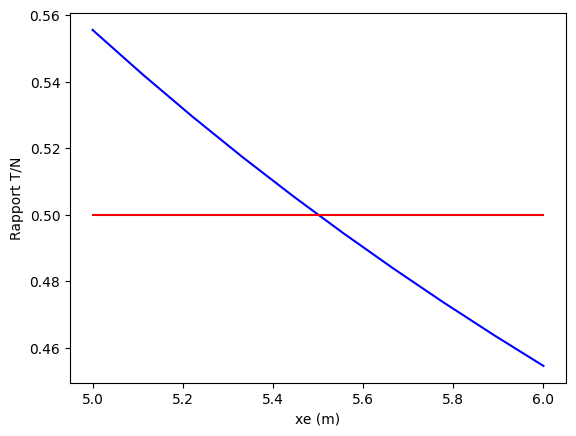

In [35]:
# On trace
plt.plot(np.linspace(5,6,10), rapport_list, '-b') 
plt.plot(np.linspace(5,6,10), np.ones(10) * 0.5, '-r')
plt.xlabel('xe (m)')
plt.ylabel('Rapport T/N')
plt.show()

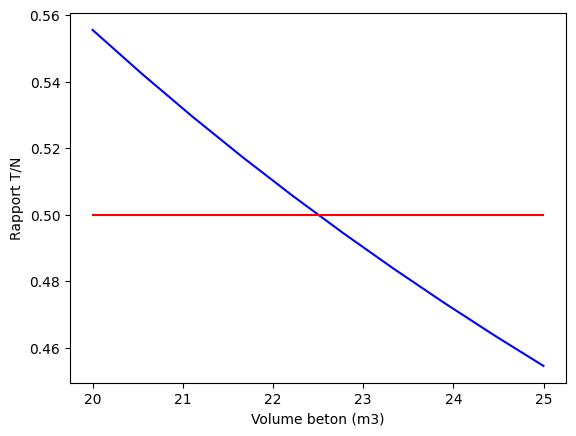

In [38]:
# On trace
plt.plot(volume_beton_list, rapport_list, '-b') 
plt.plot(volume_beton_list, np.ones(10) * 0.5, '-r')
plt.xlabel('Volume beton (m3)')
plt.ylabel('Rapport T/N')
plt.show()

On trouve graphiquement que le volume de béton est de 22.5 pour que la digue soit a l'équilibre. 

h. Expliquez pourquoi la forme courbe de l'interface aide à réduire le volume de béton nécessaire à garder la digue en équilibre.

L'interface courbée aide à maintenir la stabilité en orientant les forces vers l'intérieur de la digue. Les forces de pression de l'eau sont transmises de manière plus efficace vers la fondation de la digue par rapport a une fonction affine, ce qui renforce l'adhérence au sol et réduit le risque de glissement dela digue. Cela permet donc de réduire le volume de béton nécessaire par rapport a une digue a pente droite. 

## Parenthèse

Nous avons ici omis la deuxième équation d'équilibre statique : le théorème du moment cinétique (ou équilibre du moment des forces dans le cas statique).

Pour vérifier que la digue ne bascule pas sous la pression de l'eau, il faudrait en effet vérifier que le moment des forces qui s'applique à la digue soit nul.

Pour cela, il faudrait :

- trouver le point d'application du poids (le centre de gravité de la digue),
- calculer le moment du poids par rapport à un point,
- calculer la résultante du moment des forces de pression par rapport au même point,
- trouver le point d'application de la réaction du sol qui annule la somme des moments des forces (par rapport à un point quelconque) 
- vérifier que ce point d'application est bien situé quelque part entre la digue et le sol (sinon la digue bascule...)


